<a href="https://colab.research.google.com/github/Tanvirsarwar1603072/TitanicPredictionKaggle/blob/main/TitanicRiyal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

train = pd.read_csv("drive/MyDrive/Titanic/Dataset/train.csv")
test = pd.read_csv("drive/MyDrive/Titanic/Dataset/test.csv")

In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train.shape

(891, 12)

In [ ]:
test.shape

(418, 11)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
def bar_chart(feature):
  survived = train[train['Survived']==1][feature].value_counts()
  dead = train[train['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived','Dead']
  df.plot(kind = 'bar',figsize=(10,5))

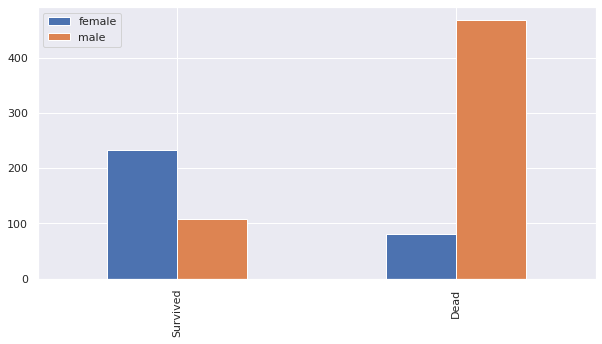

In [ ]:
bar_chart('Sex')

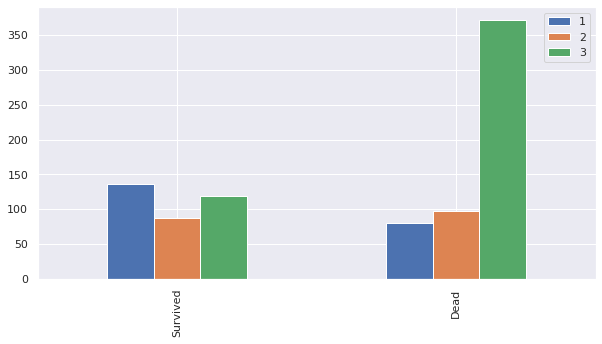

In [ ]:
bar_chart('Pclass')

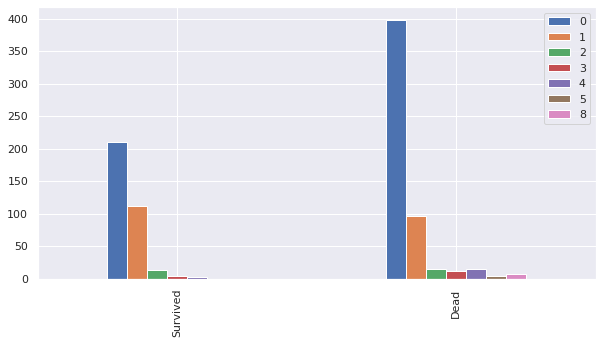

In [ ]:
bar_chart('SibSp')

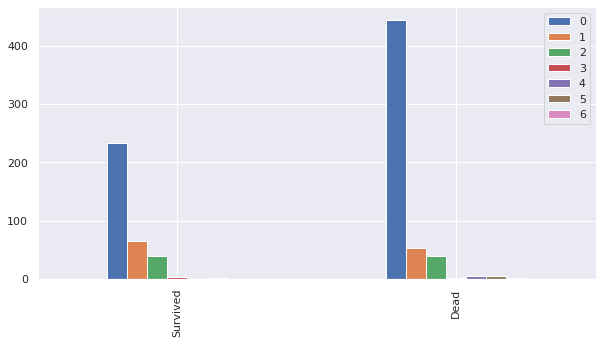

In [ ]:
bar_chart('Parch')

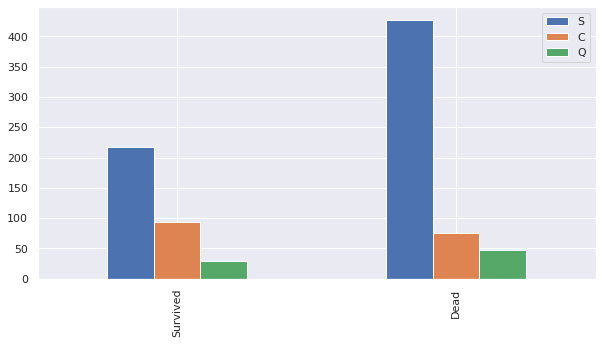

In [ ]:
bar_chart('Embarked')

In [ ]:
train_test_data = [train, test]
for dataset in train_test_data:
  dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.' ,expand = False)

In [ ]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Lady          1
Jonkheer      1
Countess      1
Don           1
Mme           1
Ms            1
Capt          1
Sir           1
Name: Title, dtype: int64

In [ ]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [ ]:
title_mapping = {"Mr" : 0, "Miss" : 1, "Mrs" : 2, "Master" : 3, "Dr" : 3, "Rev" : 3, "Major" : 3, "Col" : 3, "Mlle" : 3, "Mme" : 3, "Ms" : 3, "Sir" : 3, "Lady" : 3, "Capt" : 3, "Countess" : 3, "Jonkheer" : 3, "Don" : 3, "Dona" : 3}
for dataset in train_test_data:
  dataset['Title'] = dataset['Title'].map(title_mapping)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


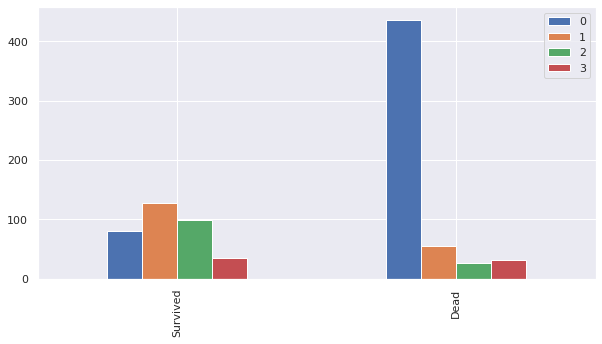

In [ ]:
bar_chart('Title')

In [ ]:
#delete unnecessary feature from dataset
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [ ]:
sex_mapping = {"male" : 0, "female" : 1}
for dataset in train_test_data:
  dataset['Sex'] = dataset['Sex'].map(sex_mapping)

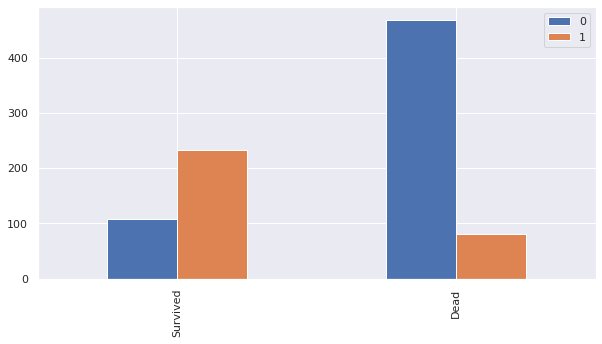

In [ ]:
bar_chart('Sex')

In [ ]:
#filling missing ages for every title
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace = True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace = True)

In [ ]:
train.groupby("Title")["Age"].transform("median")
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


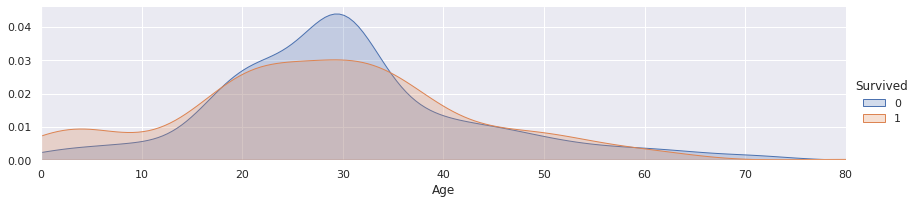

In [ ]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0,train['Age'].max()))
facet.add_legend()
plt.show()

(0.0, 20.0)

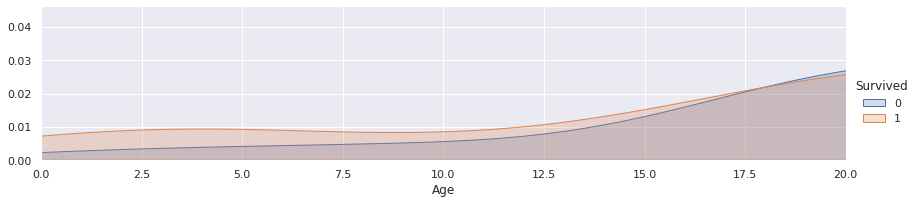

In [ ]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

(20.0, 30.0)

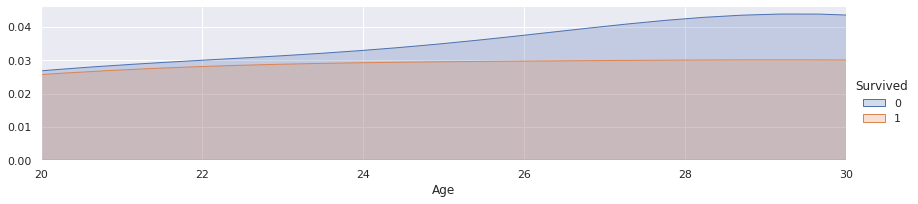

In [ ]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()
plt.xlim(20,30)

(30.0, 40.0)

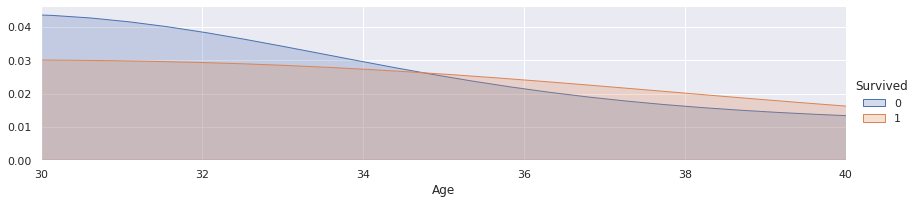

In [ ]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()
plt.xlim(30,40)

(40.0, 60.0)

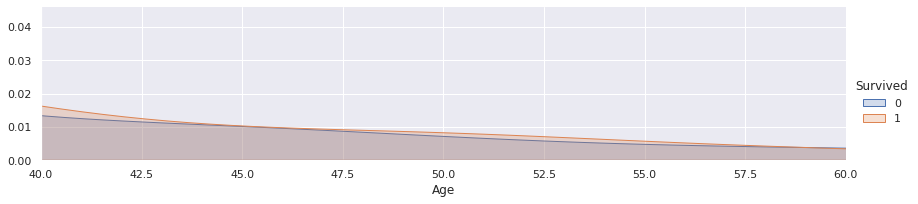

In [ ]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()
plt.xlim(40,60)

(60.0, 80.0)

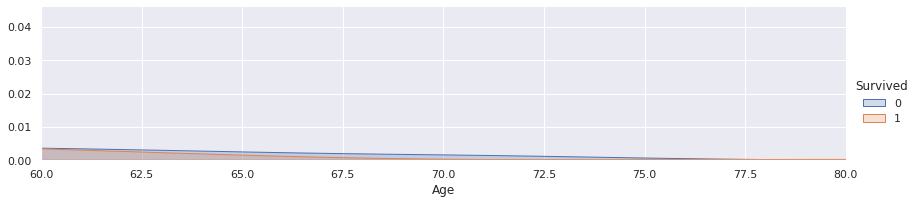

In [ ]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()
plt.xlim(60,80)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [ ]:
for dataset in train_test_data:
  dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
  dataset.loc[dataset['Age'] > 62, 'Age'] = 4


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


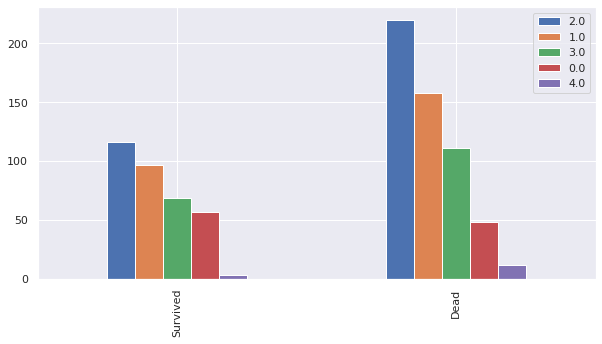

In [ ]:
bar_chart("Age")

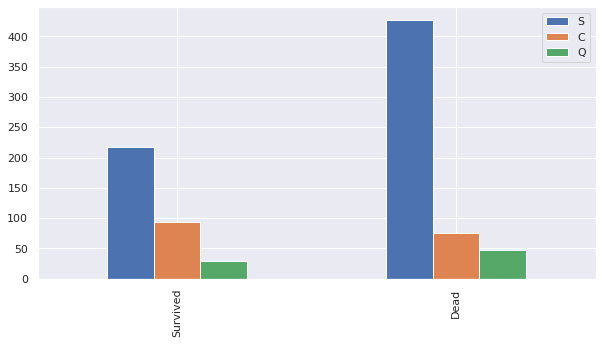

In [ ]:
bar_chart('Embarked')

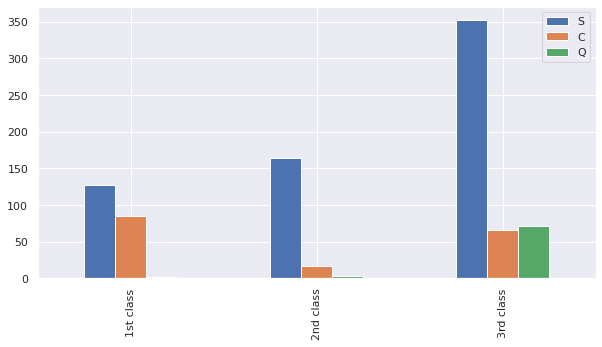

In [ ]:
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ["1st class", "2nd class", "3rd class"]
df.plot(kind = "bar", figsize = (10,5))

In [ ]:
for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [ ]:
embarked_mapping = {"S":0, "C":1, "Q":2}
for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [ ]:
#filling missing values of fare
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace = True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace = True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


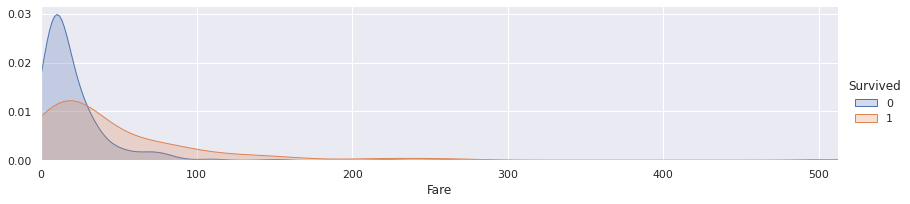

In [ ]:
facet = sns.FacetGrid(train, hue="Survived", aspect= 4)
facet.map(sns.kdeplot,'Fare', shade = True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()
plt.show()

(0.0, 20.0)

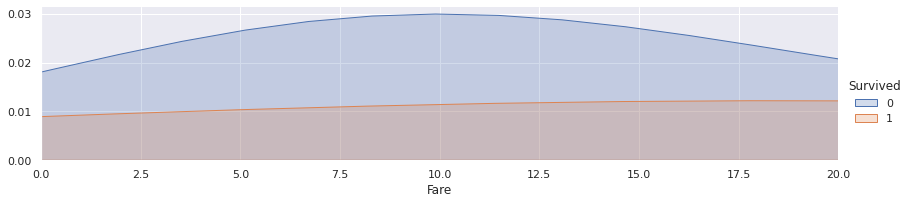

In [ ]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)

(0.0, 40.0)

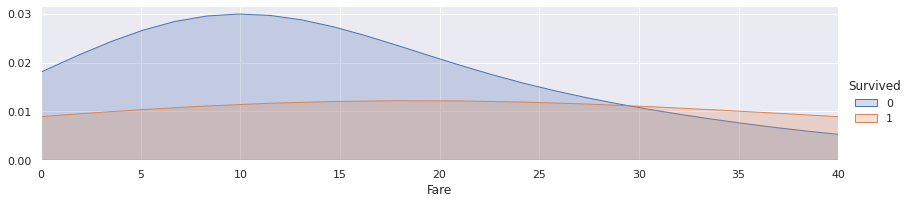

In [ ]:
facet = sns.FacetGrid(train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0,train['Fare'].max()))
facet.add_legend()

plt.xlim(0,40)

In [ ]:
for dataset in train_test_data:
  dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
  dataset.loc[dataset['Fare'] >100, 'Fare'] = 3

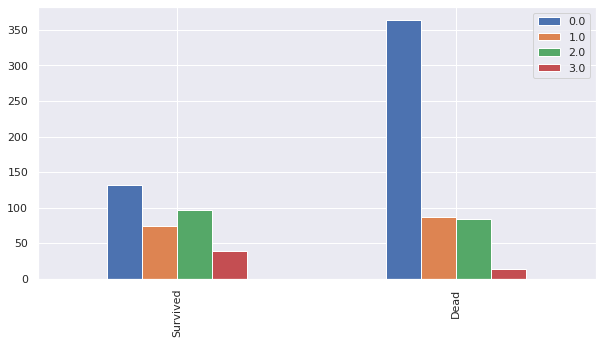

In [ ]:
bar_chart('Fare')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [ ]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
F2             3
              ..
C54            1
D50            1
E40            1
C32            1
E46            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
for dataset in train_test_data:
  dataset['Cabin'] = dataset['Cabin'].str[:1]

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


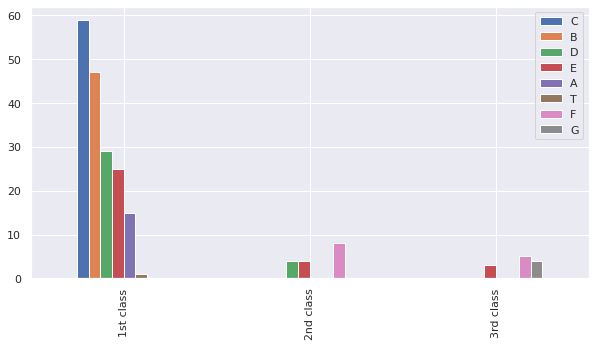

In [ ]:
Pclass1 = train[train['Pclass'] == 1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ["1st class", "2nd class", "3rd class"]

df.plot(kind = "bar", figsize = (10,5))

In [ ]:
cabin_mapping = {"A" : 0.0, "B" : 0.4, "C" : 0.8, "D" : 1.2, "E" : 1.6, "F" : 2.0, "G" : 2.4, "T" : 2.8}
for dataset in train_test_data:
  dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [ ]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace = True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace = True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        418 non-null    float64
 9   Embarked     418 non-null    int64  
 10  Title        418 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 36.0+ KB


In [ ]:
train["Familysize"] = train["SibSp"] + train["Parch"] + 1
test["Familysize"] = test["SibSp"] + test["Parch"] + 1

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
 12  Familysize   891 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 90.6+ KB


(0.0, 11.0)

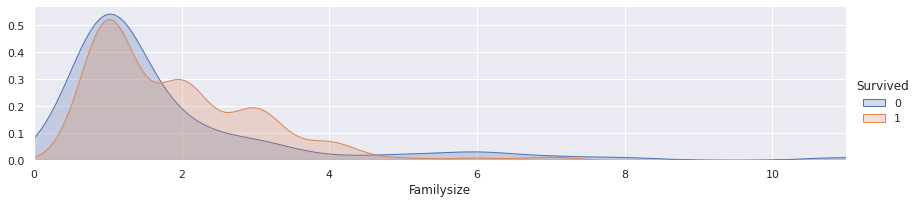

In [ ]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Familysize', shade = True)
facet.set(xlim = (0, train['Familysize'].max()))
facet.add_legend()
plt.xlim()

In [ ]:
train.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,2
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,1
5,6,0,3,0,2.0,0,0,330877,0.0,2.0,2,0,1
6,7,0,1,0,3.0,0,0,17463,2.0,1.6,0,0,1
7,8,0,3,0,0.0,3,1,349909,1.0,2.0,0,3,5
8,9,1,3,1,2.0,0,2,347742,0.0,2.0,0,2,3
9,10,1,2,1,0.0,1,0,237736,2.0,1.8,1,2,2


In [ ]:
family_mapping = {1 : 0, 2 : 0.4, 3 : 0.8, 4 : 1.2, 5 : 1.6, 6 :2, 7 : 2.4, 8 : 2.8, 9 : 3.2, 10 : 3.6, 11 : 4}
for dataset in train_test_data:
  dataset['Familysize'] = dataset['Familysize'].map(family_mapping)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
 12  Familysize   891 non-null    float64
dtypes: float64(4), int64(8), object(1)
memory usage: 90.6+ KB


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [ ]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop, axis = 1)
train = train.drop('PassengerId', axis = 1)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   Familysize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


In [ ]:
train_data = train.drop('Survived', axis = 1)
target = train['Survived']
train_data.shape, target.shape

((891, 8), (891,))

In [ ]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   Familysize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [ ]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.76666667 0.82022472 0.76404494 0.75280899 0.8988764  0.76404494
 0.83146067 0.82022472 0.74157303 0.78651685]


In [ ]:
#decisiontree score
round(np.mean(score)*100, 2)

79.46

In [ ]:
clf = RandomForestClassifier(n_estimators = 100)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.81111111 0.82022472 0.82022472 0.79775281 0.87640449 0.82022472
 0.79775281 0.80898876 0.74157303 0.84269663]


In [ ]:
#RandomForestClassifier score
round(np.mean(score)*100, 2)

81.37

In [ ]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis = 1)
prediction = clf.predict(test_data)

In [ ]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})
submission.to_csv('submission.csv', index = False)

In [ ]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
